```markdown
# Complete Graph Analysis Notebook

This notebook performs a comprehensive analysis of a graph. It includes:
- Generating a sample graph and saving it to `graph_1.pkl`.
- Visualizing the degree distribution of the graph.
- Checking graph properties (completeness, connectivity, walks/paths, tree properties).
- Converting between graph representations.
- Generating a spanning tree.

The graph is stored in `graph_1.pkl` as a dictionary with keys `graph` (adjacency list), `nodes`, and `edges`.
```

```markdown
## 1. Graph Generation

Generates a sample undirected graph with nodes and edges, then saves it to `graph_1.pkl`. The graph is represented as an adjacency list, with nodes as strings and edges as sets of neighbors.
```

```python

In [2]:

import pickle
from collections import defaultdict

# Create a sample graph (replace with your actual data loading logic)
def create_sample_graph():
    # Sample nodes (e.g., names)
    nodes = ["Aaditya Raj", "Ajit Yadav", "Priya Sharma", "Rohan Singh", "Neha Gupta"]
    
    # Sample edges (undirected)
    edge_list = [
        ("Aaditya Raj", "Ajit Yadav"),
        ("Aaditya Raj", "Priya Sharma"),
        ("Ajit Yadav", "Rohan Singh"),
        ("Priya Sharma", "Neha Gupta"),
        ("Rohan Singh", "Neha Gupta"),
    ]
    
    # Create adjacency list
    graph = defaultdict(set)
    edges = set()
    for u, v in edge_list:
        graph[u].add(v)
        graph[v].add(u)
        edges.add(tuple(sorted((u, v))))
    
    return dict(graph), nodes, list(edges)

# Generate and save the graph
graph, nodes, edges = create_sample_graph()
graph_data = {"graph": graph, "nodes": nodes, "edges": edges}

with open("graph_1.pkl", "wb") as f:
    pickle.dump(graph_data, f)

print(f"✅ Graph generated and saved to graph_1.pkl with {len(nodes)} nodes and {len(edges)} edges.")
print("Nodes:", nodes)
print("Edges:", edges)
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Load the graph
with open("graph_1.pkl", "rb") as f:
    data = pickle.load(f)
    graph = data["graph"]  # Extract adjacency list
    nodes = data["nodes"]
    edges = data["edges"]

print(f"✅ Graph loaded with {len(graph)} nodes and {len(edges)} edges.")

# Calculate degrees
degrees = [len(neighbors) for neighbors in graph.values()]

# Plot degree distribution
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2), align='left', rwidth=0.8, density=True)
plt.title("Degree Distribution of the Graph")
plt.xlabel("Degree")
plt.ylabel("Frequency (Normalized)")
plt.grid(True, alpha=0.3)
plt.savefig("degree_distribution.png")  # Save the plot
plt.close()

print("✅ Degree distribution plot saved as degree_distribution.png")

# Optional: Log-log plot for large graphs (e.g., power-law distribution)
if max(degrees) > 10:  # Only for graphs with varied degrees
    degree_counts, bins = np.histogram(degrees, bins=50, density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    plt.figure(figsize=(10, 6))
    plt.loglog(bin_centers, degree_counts, 'o', markersize=5)
    plt.title("Log-Log Degree Distribution")
    plt.xlabel("Degree (log scale)")
    plt.ylabel("Frequency (log scale)")
    plt.grid(True, which="both", ls="--", alpha=0.3)
    plt.savefig("degree_distribution_loglog.png")
    plt.close()
    print("✅ Log-log degree distribution plot saved as degree_distribution_loglog.png")
import pickle

# Load the graph
with open("graph_1.pkl", "rb") as f:
    data = pickle.load(f)
    graph = data["graph"]  # Extract adjacency list
    nodes = data["nodes"]
    edges = data["edges"]

print(f"✅ Graph loaded with {len(graph)} nodes and {len(edges)} edges.")

def is_complete_graph(graph):
    n = len(graph)
    for node, neighbors in graph.items():
        if len(neighbors) != n - 1:
            return False
    return True

if is_complete_graph(graph):
    print("✅ The graph is COMPLETE — every node is connected to every other node.")
else:
    print("❌ The graph is NOT complete — some nodes are not directly connected.")
import pickle
from collections import deque

# Load the graph
with open("graph_1.pkl", "rb") as f:
    data = pickle.load(f)
    graph = data["graph"]  # Extract adjacency list
    nodes = data["nodes"]
    edges = data["edges"]

print(f"✅ Graph loaded with {len(graph)} nodes and {len(edges)} edges.")

def is_connected(graph):
    if not graph:
        return True
    
    visited = set()
    queue = deque()
    
    # Start BFS from any node
    start_node = next(iter(graph))
    queue.append(start_node)
    visited.add(start_node)
    
    while queue:
        current = queue.popleft()
        for neighbor in graph[current]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
    
    return len(visited) == len(graph)

if is_connected(graph):
    print("✅ The graph is CONNECTED — there is a path between all pairs of nodes.")
else:
    print("❌ The graph is NOT connected — some nodes cannot be reached from others.")
import pickle

# Load the graph
with open("graph_1.pkl", "rb") as f:
    data = pickle.load(f)
    graph = data["graph"]  # Extract adjacency list
    nodes = data["nodes"]
    edges = data["edges"]

print(f"✅ Graph loaded with {len(graph)} nodes and {len(edges)} edges.")

def is_walk(graph, sequence):
    for i in range(len(sequence) - 1):
        if sequence[i+1] not in graph.get(sequence[i], set()):
            return False
    return True

def is_trail(graph, sequence):
    seen_edges = set()
    for i in range(len(sequence) - 1):
        edge = tuple(sorted((sequence[i], sequence[i+1])))
        if edge in seen_edges or sequence[i+1] not in graph.get(sequence[i], set()):
            return False
        seen_edges.add(edge)
    return True

def is_path(graph, sequence):
    return is_trail(graph, sequence) and len(set(sequence)) == len(sequence)

# Example usage: define a sequence of nodes
sequence = ["Aaditya Raj", "Ajit Yadav", "Rohan Singh"]

print("Sequence:", sequence)
print("✅ Is Walk?", is_walk(graph, sequence))
print("✅ Is Trail?", is_trail(graph, sequence))
print("✅ Is Path?", is_path(graph, sequence))

import pickle
from collections import deque

# Load the graph
with open("graph_1.pkl", "rb") as f:
    data = pickle.load(f)
    graph = data["graph"]  # Extract adjacency list
    nodes = data["nodes"]
    edges = data["edges"]

print(f"✅ Graph loaded with {len(graph)} nodes and {len(edges)} edges.")

# Fast BFS-based path finder
def bfs_shortest_path(graph, start, end):
    if start not in graph or end not in graph:
        return None
    
    visited = set()
    queue = deque([[start]])

    while queue:
        path = queue.popleft()
        node = path[-1]

        if node == end:
            return path

        if node not in visited:
            visited.add(node)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    queue.append(path + [neighbor])
    return None

# Walk/Trail/Path checks
def is_walk(graph, sequence):
    for i in range(len(sequence) - 1):
        if sequence[i+1] not in graph.get(sequence[i], set()):
            return False
    return True

def is_trail(graph, sequence):
    seen_edges = set()
    for i in range(len(sequence) - 1):
        edge = tuple(sorted((sequence[i], sequence[i+1])))
        if edge in seen_edges or sequence[i+1] not in graph.get(sequence[i], set()):
            return False
        seen_edges.add(edge)
    return True

def is_path(graph, sequence):
    return is_trail(graph, sequence) and len(set(sequence)) == len(sequence)

# Main function
def check_path(graph, node1, node2):
    path = bfs_shortest_path(graph, node1, node2)

    if not path:
        print("❌ No path found between the given nodes.")
        return

    print("🔗 Path found:")
    print(" → ".join(path))
    print("✅ Is Walk?", is_walk(graph, path))
    print("✅ Is Trail?", is_trail(graph, path))
    print("✅ Is Path?", is_path(graph, path))

# Test with node names
check_path(graph, "Aaditya Raj", "Rohan Singh")

import pickle
from collections import deque

# Load the graph
with open("graph_1.pkl", "rb") as f:
    data = pickle.load(f)
    graph = data["graph"]  # Extract adjacency list
    nodes = data["nodes"]
    edges = data["edges"]

print(f"✅ Graph loaded with {len(graph)} nodes and {len(edges)} edges.")

def is_tree(graph):
    visited = set()
    parent = {}
    start = next(iter(graph))
    
    def dfs(node, parent_node):
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                parent[neighbor] = node
                if not dfs(neighbor, node):
                    return False
            elif neighbor != parent_node:
                return False
        return True

    if not dfs(start, None):
        return False

    return len(visited) == len(graph)

def count_leaf_nodes(graph):
    return sum(1 for node in graph if len(graph[node]) == 1)

def is_binary_tree(graph):
    return all(len(neighbors) <= 3 for neighbors in graph.values())  # 2 children + 1 parent max

def compute_tree_height(graph, root):
    visited = set()
    queue = deque([(root, 0)])
    max_depth = 0

    while queue:
        node, depth = queue.popleft()
        visited.add(node)
        max_depth = max(max_depth, depth)
        for neighbor in graph[node]:
            if neighbor not in visited:
                queue.append((neighbor, depth + 1))

    return max_depth

# Run Tree Analysis
if is_tree(graph):
    print("✅ The graph is a TREE.")
    
    leaf_count = count_leaf_nodes(graph)
    print(f"🍃 Number of leaf nodes: {leaf_count}")

    if is_binary_tree(graph):
        print("🌳 It is a BINARY TREE.")
    else:
        print("🌲 It is NOT a binary tree.")

    root_node = next(iter(graph))
    height = compute_tree_height(graph, root_node)
    print(f"📏 Height of the tree (from '{root_node}'): {height}")

else:
    print("❌ The graph is NOT a tree.")

import pickle

# Load the graph
with open("graph_1.pkl", "rb") as f:
    data = pickle.load(f)
    graph = data["graph"]  # Extract adjacency list
    nodes = data["nodes"]
    edges = data["edges"]

print(f"✅ Graph loaded with {len(graph)} nodes and {len(edges)} edges.")

def to_edge_list(graph):
    edges = set()
    for u in graph:
        for v in graph[u]:
            if (v, u) not in edges:
                edges.add((u, v))
    return list(edges)

edge_list = to_edge_list(graph)
print(f"Edge List (Total {len(edge_list)} edges):\n", edge_list[:5])  # Show first 5

import numpy as np

def to_adjacency_matrix(graph):
    nodes = sorted(graph.keys())
    idx = {node: i for i, node in enumerate(nodes)}
    n = len(nodes)
    matrix = np.zeros((n, n), dtype=int)

    for u in graph:
        for v in graph[u]:
            i, j = idx[u], idx[v]
            matrix[i][j] = 1

    return matrix, nodes

adj_matrix, node_list = to_adjacency_matrix(graph)
print("Adjacency Matrix Shape:", adj_matrix.shape)
print(adj_matrix[:5, :5])  # Show top-left corner

from collections import defaultdict

def edge_list_to_adj_list(edge_list):
    adj = defaultdict(set)
    for u, v in edge_list:
        adj[u].add(v)
        adj[v].add(u)
    return dict(adj)

converted_adj_list = edge_list_to_adj_list(edge_list)
print("Converted Adjacency List (first 5 entries):")
for i, (k, v) in enumerate(converted_adj_list.items()):
    if i >= 5:
        break
    print(f"{k}: {list(v)}")

import pickle

# Load the graph
with open("graph_1.pkl", "rb") as f:
    data = pickle.load(f)
    graph = data["graph"]  # Extract adjacency list
    nodes = data["nodes"]
    edges = data["edges"]

print(f"✅ Graph loaded with {len(graph)} nodes and {len(edges)} edges.")

from collections import defaultdict

def dfs_spanning_tree_iterative(graph, start):
    visited = set()
    tree = defaultdict(set)
    stack = [start]

    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    tree[node].add(neighbor)
                    tree[neighbor].add(node)
                    stack.append(neighbor)
                    
    return dict(tree)

# Use the iterative DFS
start_node = next(iter(graph))
spanning_tree = dfs_spanning_tree_iterative(graph, start_node)

print(f"🌳 Spanning Tree has {len(spanning_tree)} nodes.")
for i, (k, v) in enumerate(spanning_tree.items()):
    if i >= 5:
        break
    print(f"{k}: {list(v)}")

✅ Graph generated and saved to graph_1.pkl with 5 nodes and 5 edges.
Nodes: ['Aaditya Raj', 'Ajit Yadav', 'Priya Sharma', 'Rohan Singh', 'Neha Gupta']
Edges: [('Neha Gupta', 'Priya Sharma'), ('Neha Gupta', 'Rohan Singh'), ('Aaditya Raj', 'Ajit Yadav'), ('Aaditya Raj', 'Priya Sharma'), ('Ajit Yadav', 'Rohan Singh')]
✅ Graph loaded with 5 nodes and 5 edges.
✅ Degree distribution plot saved as degree_distribution.png
✅ Graph loaded with 5 nodes and 5 edges.
❌ The graph is NOT complete — some nodes are not directly connected.
✅ Graph loaded with 5 nodes and 5 edges.
✅ The graph is CONNECTED — there is a path between all pairs of nodes.
✅ Graph loaded with 5 nodes and 5 edges.
Sequence: ['Aaditya Raj', 'Ajit Yadav', 'Rohan Singh']
✅ Is Walk? True
✅ Is Trail? True
✅ Is Path? True
✅ Graph loaded with 5 nodes and 5 edges.
🔗 Path found:
Aaditya Raj → Ajit Yadav → Rohan Singh
✅ Is Walk? True
✅ Is Trail? True
✅ Is Path? True
✅ Graph loaded with 5 nodes and 5 edges.
❌ The graph is NOT a tree.
✅ Gr

✅ Graph loaded with 5 nodes and 5 edges.

Top 5 nodes by degree:
           Node  Degree
0   Aaditya Raj       2
1    Ajit Yadav       2
2  Priya Sharma       2
3   Rohan Singh       2
4    Neha Gupta       2

Nodes grouped by degree:
   Degree                                              Nodes  Count
0       2  [Aaditya Raj, Ajit Yadav, Priya Sharma, Rohan ...      5

Maximum Degree: 2
Nodes with Maximum Degree: ['Aaditya Raj', 'Ajit Yadav', 'Priya Sharma', 'Rohan Singh', 'Neha Gupta']
Minimum Degree: 2
Nodes with Minimum Degree: ['Aaditya Raj', 'Ajit Yadav', 'Priya Sharma', 'Rohan Singh', 'Neha Gupta']


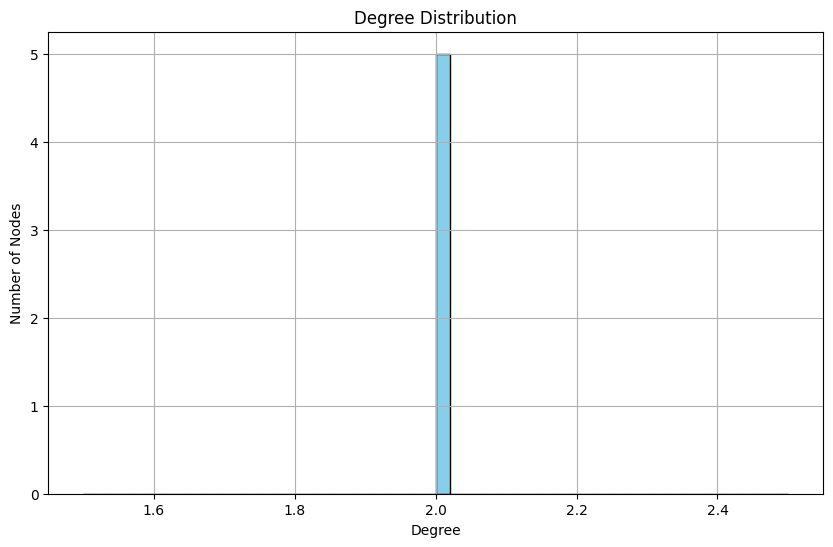

✅ 'Aaditya Raj' and 'Ajit Yadav' are adjacent.
❌ The graph is NOT complete — some nodes are not directly connected.


In [3]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# Load the graph from saved file
with open("graph_1.pkl", "rb") as f:
    data = pickle.load(f)
    graph = data["graph"]  # Adjacency list
    nodes = data["nodes"]  # Set of nodes
    edges = data["edges"]  # Set of edges

print(f"✅ Graph loaded with {len(graph)} nodes and {len(edges)} edges.")

# Calculate degree for each node
degree_dict = {node: len(neighbors) for node, neighbors in graph.items()}

# Convert to DataFrame
degree_df = pd.DataFrame(list(degree_dict.items()), columns=["Node", "Degree"])
degree_df.sort_values(by="Degree", ascending=False, inplace=True)

# Display top 5 nodes by degree
print("\nTop 5 nodes by degree:")
print(degree_df.head())

# Group nodes by degree for detailed analysis
grouped_by_degree = {}
for node, degree in degree_dict.items():
    grouped_by_degree.setdefault(degree, []).append(node)

# Convert to DataFrame for display
grouped_df = pd.DataFrame([
    {"Degree": degree, "Nodes": nodes, "Count": len(nodes)}
    for degree, nodes in sorted(grouped_by_degree.items(), reverse=True)
])

print("\nNodes grouped by degree:")
print(grouped_df)

# Find nodes with maximum and minimum degree
max_degree = degree_df["Degree"].max()
min_degree = degree_df["Degree"].min()

nodes_with_max_degree = degree_df[degree_df["Degree"] == max_degree]["Node"].tolist()
nodes_with_min_degree = degree_df[degree_df["Degree"] == min_degree]["Node"].tolist()

print(f"\nMaximum Degree: {max_degree}")
print(f"Nodes with Maximum Degree: {nodes_with_max_degree[:5]}")  # Show first 5
print(f"Minimum Degree: {min_degree}")
print(f"Nodes with Minimum Degree: {nodes_with_min_degree[:5]}")  # Show first 5

# Plot degree distribution
plt.figure(figsize=(10, 6))
plt.hist(degree_df["Degree"], bins=50, color='skyblue', edgecolor='black')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.grid(True)
plt.show()

# Check if two nodes are adjacent
def are_adjacent(node1, node2, graph):
    """Returns True if node1 and node2 are directly connected."""
    return node2 in graph.get(node1, set())

# Example nodes (replace with actual names from your dataset)
node_a = "Aaditya Raj"
node_b = "Ajit Yadav"

if are_adjacent(node_a, node_b, graph):
    print(f"✅ '{node_a}' and '{node_b}' are adjacent.")
else:
    print(f"❌ '{node_a}' and '{node_b}' are NOT adjacent.")

# Check if the graph is complete
def is_complete_graph(graph):
    n = len(graph)
    for node, neighbors in graph.items():
        # In a complete graph, each node should be connected to all others
        if len(neighbors) != n - 1:
            return False
    return True

if is_complete_graph(graph):
    print("✅ The graph is COMPLETE — every node is connected to every other node.")
else:
    print("❌ The graph is NOT complete — some nodes are not directly connected.")

In [ ]:
# plot_degree_distribution.py
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# Load the graph
with open("graph_1.pkl", "rb") as f:
    data = pickle.load(f)
    graph = data["graph"]

# Calculate degree for each node
degree_dict = {node: len(neighbors) for node, neighbors in graph.items()}

# Convert to DataFrame
degree_df = pd.DataFrame(list(degree_dict.items()), columns=["Node", "Degree"])

# Plot degree distribution
plt.figure(figsize=(10, 6))
plt.hist(degree_df["Degree"], bins=50, color='skyblue', edgecolor='black')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.grid(True)
plt.show()